# YOLO Model Fine-tuning for Insect Detection

This notebook demonstrates fine-tuning YOLO11n and YOLO8n models on a custom insect detection dataset.

**Dataset Classes:**
- 0: Butterfly
- 1: Beetle
- 2: Ladybug
- 3: Bee

## 1. Setup and Installation

Install the Ultralytics library which provides YOLO models.

In [1]:
# Install/Upgrade required packages with compatible versions
!pip install --upgrade pip
!pip install --upgrade torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install --upgrade ultralytics
!pip install opencv-python matplotlib pillow pyyaml

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 3.2 MB/s eta 0:00:003.2 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cpu
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.8/188.8 MB 7.7 MB/s  0:00:24 eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 160.9 kB/s  0:00:355.0 kB/s eta 0:00:02:04
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch━━━━━━━━━━━━━━━━━━━━━━━━━ 0/4 [sympy]
    Found existing installation: torch 2.5.1+cu121 0/4 [sympy]
    Uninstalling torch-2.5.1+cu121:╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/4 [torch]
      Successfully uninstalled torch-2.5.1+cu121━━━━━━━━━━━━━━

## 2. Import Libraries

In [2]:
from ultralytics import YOLO
import os
import yaml
from pathlib import Path
import torch
import cv2
import matplotlib.pyplot as plt
from IPython.display import Image, display

# Check if GPU is available
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU: {torch.cuda.get_device_name(0)}")

PyTorch version: 2.10.0+cpu
CUDA available: False


## 3. Dataset Configuration

Verify the dataset structure and configuration.

In [3]:
# Dataset path
DATASET_PATH = '/home/muneeb/fyp/dataset_split'
DATASET_YAML = os.path.join(DATASET_PATH, 'dataset.yaml')

# Verify dataset structure
print("Dataset structure:")
print(f"Dataset path: {DATASET_PATH}")
print(f"YAML config: {DATASET_YAML}")
print("\nDirectory contents:")

for split in ['train', 'val', 'test']:
    img_dir = os.path.join(DATASET_PATH, 'images', split)
    lbl_dir = os.path.join(DATASET_PATH, 'labels', split)
    
    if os.path.exists(img_dir):
        num_images = len(os.listdir(img_dir))
        num_labels = len(os.listdir(lbl_dir)) if os.path.exists(lbl_dir) else 0
        print(f"{split.capitalize():5} - Images: {num_images:4}, Labels: {num_labels:4}")

# Load and display dataset.yaml
print("\nDataset configuration:")
with open(DATASET_YAML, 'r') as f:
    config = yaml.safe_load(f)
    print(yaml.dump(config, default_flow_style=False))

Dataset structure:
Dataset path: /home/muneeb/fyp/dataset_split
YAML config: /home/muneeb/fyp/dataset_split/dataset.yaml

Directory contents:
Train - Images: 1400, Labels: 1400
Val   - Images:  400, Labels:  400
Test  - Images:  200, Labels:  200

Dataset configuration:
names:
  0: Butterfly
  1: Beetle
  2: Ladybug
  3: Bee
nc: 4
path: /home/muneeb/fyp/dataset_split
test: ./images/test
train: ./images/train
val: ./images/val



## 4. Training Configuration

In [4]:
# Training hyperparameters
EPOCHS = 100
BATCH_SIZE = 16
IMG_SIZE = 640
DEVICE = 0 if torch.cuda.is_available() else 'cpu'
WORKERS = 8

# Project directories for saving results
PROJECT_DIR = '/home/muneeb/fyp/runs'

print(f"Training Configuration:")
print(f"  Epochs: {EPOCHS}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Image Size: {IMG_SIZE}")
print(f"  Device: {DEVICE}")
print(f"  Workers: {WORKERS}")
print(f"  Results Directory: {PROJECT_DIR}")

Training Configuration:
  Epochs: 100
  Batch Size: 16
  Image Size: 640
  Device: cpu
  Workers: 8
  Results Directory: /home/muneeb/fyp/runs


## 5. Fine-tune YOLO11n Model

Train the YOLO11n (nano) model on the insect detection dataset.

In [5]:
# Load YOLO11n model
print("Loading YOLO11n model...")
model_yolo11n = YOLO('yolo11n.pt')

print("\nStarting YOLO11n training...")
print("=" * 60)

Loading YOLO11n model...

Starting YOLO11n training...


In [6]:
# Train YOLO11n
results_yolo11n = model_yolo11n.train(
    data=DATASET_YAML,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    workers=WORKERS,
    project=PROJECT_DIR,
    name='yolo11n_insect_detection',
    patience=20,
    save=True,
    plots=True,
    verbose=True
)

print("\nYOLO11n training completed!")

Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/muneeb/fyp/dataset_split/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo11n_insect_detection2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask

## 6. Evaluate YOLO11n Model

In [7]:
# Evaluate on validation set
print("Evaluating YOLO11n on validation set...")
metrics_yolo11n = model_yolo11n.val()

# Print metrics
print("\nYOLO11n Validation Metrics:")
print(f"  mAP50: {metrics_yolo11n.box.map50:.4f}")
print(f"  mAP50-95: {metrics_yolo11n.box.map:.4f}")
print(f"  Precision: {metrics_yolo11n.box.mp:.4f}")
print(f"  Recall: {metrics_yolo11n.box.mr:.4f}")

Evaluating YOLO11n on validation set...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
YOLO11n summary (fused): 101 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9916.9±1634.7 MB/s, size: 344.8 KB)
val: Scanning /home/muneeb/fyp/dataset_split/labels/val.cache... 400 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 400/400 167.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 4.0it/s 6.3s0.3s
                   all        400       1118      0.856      0.735      0.787      0.542
             Butterfly        182        367      0.837      0.877      0.904      0.688
                Beetle         66        151      0.838      0.894      0.933      0.647
               Ladybug         32         35      0.948      0.829      0.892      0.616
                   Bee        122        565      0.803      0.339      0.421 

## 7. Fine-tune YOLO8n Model

Train the YOLOv8n (nano) model on the same dataset for comparison.

In [8]:
# Load YOLOv8n model
print("Loading YOLOv8n model...")
model_yolo8n = YOLO('yolov8n.pt')

print("\nStarting YOLOv8n training...")
print("=" * 60)

Loading YOLOv8n model...

Starting YOLOv8n training...


In [9]:
# Train YOLOv8n
results_yolo8n = model_yolo8n.train(
    data=DATASET_YAML,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    batch=BATCH_SIZE,
    device=DEVICE,
    workers=WORKERS,
    project=PROJECT_DIR,
    name='yolo8n_insect_detection',
    patience=20,
    save=True,
    plots=True,
    verbose=True
)

print("\nYOLOv8n training completed!")

Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/muneeb/fyp/dataset_split/dataset.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolo8n_insect_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=T

## 8. Evaluate YOLO8n Model

In [10]:
# Evaluate on validation set
print("Evaluating YOLOv8n on validation set...")
metrics_yolo8n = model_yolo8n.val()

# Print metrics
print("\nYOLOv8n Validation Metrics:")
print(f"  mAP50: {metrics_yolo8n.box.map50:.4f}")
print(f"  mAP50-95: {metrics_yolo8n.box.map:.4f}")
print(f"  Precision: {metrics_yolo8n.box.mp:.4f}")
print(f"  Recall: {metrics_yolo8n.box.mr:.4f}")

Evaluating YOLOv8n on validation set...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
Model summary (fused): 73 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6723.3±1361.8 MB/s, size: 256.1 KB)
val: Scanning /home/muneeb/fyp/dataset_split/labels/val.cache... 400 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 400/400 167.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 25/25 3.1it/s 8.0s0.3s
                   all        400       1118      0.831      0.777      0.814       0.56
             Butterfly        182        367       0.82       0.93      0.943      0.709
                Beetle         66        151      0.849      0.901      0.924       0.65
               Ladybug         32         35      0.877      0.914      0.925       0.65
                   Bee        122        565      0.777      0.363      0.465    

## 9. Model Comparison

In [11]:
# Compare both models
print("Model Performance Comparison:")
print("=" * 70)
print(f"{'Metric':<15} {'YOLO11n':>15} {'YOLOv8n':>15} {'Winner':>15}")
print("=" * 70)

metrics_comparison = [
    ('mAP50', metrics_yolo11n.box.map50, metrics_yolo8n.box.map50),
    ('mAP50-95', metrics_yolo11n.box.map, metrics_yolo8n.box.map),
    ('Precision', metrics_yolo11n.box.mp, metrics_yolo8n.box.mp),
    ('Recall', metrics_yolo11n.box.mr, metrics_yolo8n.box.mr)
]

for metric_name, yolo11_val, yolo8_val in metrics_comparison:
    winner = 'YOLO11n' if yolo11_val > yolo8_val else 'YOLOv8n'
    print(f"{metric_name:<15} {yolo11_val:>15.4f} {yolo8_val:>15.4f} {winner:>15}")

print("=" * 70)

Model Performance Comparison:
Metric                  YOLO11n         YOLOv8n          Winner
mAP50                    0.7874          0.8145         YOLOv8n
mAP50-95                 0.5421          0.5602         YOLOv8n
Precision                0.8564          0.8308         YOLO11n
Recall                   0.7347          0.7770         YOLOv8n


## 10. Test on Test Set

Evaluate both models on the test set for final performance assessment.

In [12]:
# Test YOLO11n on test set
print("Testing YOLO11n on test set...")
test_metrics_yolo11n = model_yolo11n.val(split='test')

print("\nYOLO11n Test Metrics:")
print(f"  mAP50: {test_metrics_yolo11n.box.map50:.4f}")
print(f"  mAP50-95: {test_metrics_yolo11n.box.map:.4f}")
print(f"  Precision: {test_metrics_yolo11n.box.mp:.4f}")
print(f"  Recall: {test_metrics_yolo11n.box.mr:.4f}")

Testing YOLO11n on test set...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1068.9±1363.9 MB/s, size: 431.8 KB)
val: Scanning /home/muneeb/fyp/dataset_split/labels/test... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 5.7Kit/s 0.0s
val: New cache created: /home/muneeb/fyp/dataset_split/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.6it/s 3.6s0.3s
                   all        200        483      0.877       0.65      0.727      0.509
             Butterfly        113        222       0.94      0.788      0.885      0.639
                Beetle         25         30      0.862        0.9      0.881      0.592
               Ladybug         13         14      0.809      0.714        0.8      0.606
                   Bee         50        217      0.895      0.197      0.341      0.198
Speed: 0.2ms pr

In [13]:
# Test YOLOv8n on test set
print("Testing YOLOv8n on test set...")
test_metrics_yolo8n = model_yolo8n.val(split='test')

print("\nYOLOv8n Test Metrics:")
print(f"  mAP50: {test_metrics_yolo8n.box.map50:.4f}")
print(f"  mAP50-95: {test_metrics_yolo8n.box.map:.4f}")
print(f"  Precision: {test_metrics_yolo8n.box.mp:.4f}")
print(f"  Recall: {test_metrics_yolo8n.box.mr:.4f}")

Testing YOLOv8n on test set...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 9303.3±1824.4 MB/s, size: 546.6 KB)
val: Scanning /home/muneeb/fyp/dataset_split/labels/test.cache... 200 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 200/200 93.2Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 13/13 3.4it/s 3.8s0.3s
                   all        200        483      0.771      0.672       0.72       0.52
             Butterfly        113        222      0.904      0.842      0.894      0.638
                Beetle         25         30      0.769      0.776      0.883      0.651
               Ladybug         13         14      0.649      0.857      0.787        0.6
                   Bee         50        217      0.761      0.212      0.316       0.19
Speed: 0.2ms preprocess, 14.2ms inference, 0.0ms loss, 0.2ms postprocess per imag

## 11. Inference Examples

Run inference on sample test images to visualize predictions.

In [14]:
# Get sample test images
test_images_dir = os.path.join(DATASET_PATH, 'images', 'test')
test_images = [os.path.join(test_images_dir, img) for img in os.listdir(test_images_dir)[:5]]

print(f"Running inference on {len(test_images)} sample images...")

Running inference on 5 sample images...


In [15]:
# Predict with YOLO11n
print("YOLO11n Predictions:")
results_inference_11n = model_yolo11n.predict(
    source=test_images,
    save=True,
    project=PROJECT_DIR,
    name='yolo11n_predictions',
    conf=0.25
)

# Display predictions
for i, result in enumerate(results_inference_11n):
    print(f"\nImage {i+1}: {os.path.basename(test_images[i])}")
    print(f"  Detections: {len(result.boxes)}")
    
    # Show image with predictions
    result.show()

YOLO11n Predictions:

0: 640x640 2 Butterflys, 15.5ms
1: 640x640 1 Butterfly, 15.5ms
2: 640x640 1 Butterfly, 15.5ms
3: 640x640 4 Bees, 15.5ms
4: 640x640 1 Butterfly, 1 Beetle, 15.5ms
Speed: 0.9ms preprocess, 15.5ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/muneeb/fyp/runs/yolo11n_predictions

Image 1: 0619b3037f5ba78a.jpg
  Detections: 2

Image 2: 11cfcc44c0773c5e.jpg
  Detections: 1

Image 3: 00147b869808bf8a.jpg
  Detections: 1

Image 4: 16e182e7f3efdb99.jpg
  Detections: 4

Image 5: 01e3231005528101.jpg
  Detections: 2


In [16]:
# Predict with YOLOv8n
print("YOLOv8n Predictions:")
results_inference_8n = model_yolo8n.predict(
    source=test_images,
    save=True,
    project=PROJECT_DIR,
    name='yolo8n_predictions',
    conf=0.25
)

# Display predictions
for i, result in enumerate(results_inference_8n):
    print(f"\nImage {i+1}: {os.path.basename(test_images[i])}")
    print(f"  Detections: {len(result.boxes)}")
    
    # Show image with predictions
    result.show()

YOLOv8n Predictions:

0: 640x640 1 Butterfly, 16.8ms
1: 640x640 1 Butterfly, 16.8ms
2: 640x640 1 Butterfly, 16.8ms
3: 640x640 29 Bees, 16.8ms
4: 640x640 1 Beetle, 16.8ms
Speed: 0.9ms preprocess, 16.8ms inference, 0.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/muneeb/fyp/runs/yolo8n_predictions

Image 1: 0619b3037f5ba78a.jpg
  Detections: 1

Image 2: 11cfcc44c0773c5e.jpg
  Detections: 1

Image 3: 00147b869808bf8a.jpg
  Detections: 1

Image 4: 16e182e7f3efdb99.jpg
  Detections: 29

Image 5: 01e3231005528101.jpg
  Detections: 1


## 12. Export Models

Export the trained models to different formats for deployment.

In [17]:
# Export YOLO11n to ONNX format
print("Exporting YOLO11n to ONNX format...")
model_yolo11n.export(format='onnx')

# Export YOLOv8n to ONNX format
print("\nExporting YOLOv8n to ONNX format...")
model_yolo8n.export(format='onnx')

print("\nModels exported successfully!")

Exporting YOLO11n to ONNX format...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/home/muneeb/fyp/runs/yolo11n_insect_detection2/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.2 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<2.0.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.5 MB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.5 MB ? eta -:--:--
   ━━━━━

/home/muneeb/.local/lib/python3.10/site-packages/torch/onnx/_internal/torchscript_exporter/utils.py:552: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  _export(


ONNX: slimming with onnxslim 0.1.84...
ONNX: export success ✅ 392.8s, saved as '/home/muneeb/fyp/runs/yolo11n_insect_detection2/weights/best.onnx' (10.1 MB)

Export complete (393.0s)
Results saved to /home/muneeb/fyp/runs/yolo11n_insect_detection2/weights
Predict:         yolo predict task=detect model=/home/muneeb/fyp/runs/yolo11n_insect_detection2/weights/best.onnx imgsz=640 
Validate:        yolo val task=detect model=/home/muneeb/fyp/runs/yolo11n_insect_detection2/weights/best.onnx imgsz=640 data=/home/muneeb/fyp/dataset_split/dataset.yaml  
Visualize:       https://netron.app

Exporting YOLOv8n to ONNX format...
Ultralytics 8.4.12 🚀 Python-3.10.12 torch-2.10.0+cpu CPU (Intel Core i9-14900KF)

PyTorch: starting from '/home/muneeb/fyp/runs/yolo8n_insect_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 8, 8400) (5.9 MB)

ONNX: starting export with onnx 1.20.1 opset 22...
ONNX: slimming with onnxslim 0.1.84...
ONNX: export success ✅ 0.3s, saved

## 13. View Training Results

Display training curves and results.

In [23]:
# Display training results for YOLO11n
yolo11n_results_dir = os.path.join(PROJECT_DIR, 'yolo11n_insect_detection')
results_img = os.path.join(yolo11n_results_dir, 'results.png')

if os.path.exists(results_img):
    print("YOLO11n Training Results:")
    display(Image(filename=results_img))

# Display confusion matrix
confusion_matrix_img = os.path.join(yolo11n_results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_img):
    print("\nYOLO11n Confusion Matrix:")
    display(Image(filename=confusion_matrix_img))

YOLOv8n Training Results:


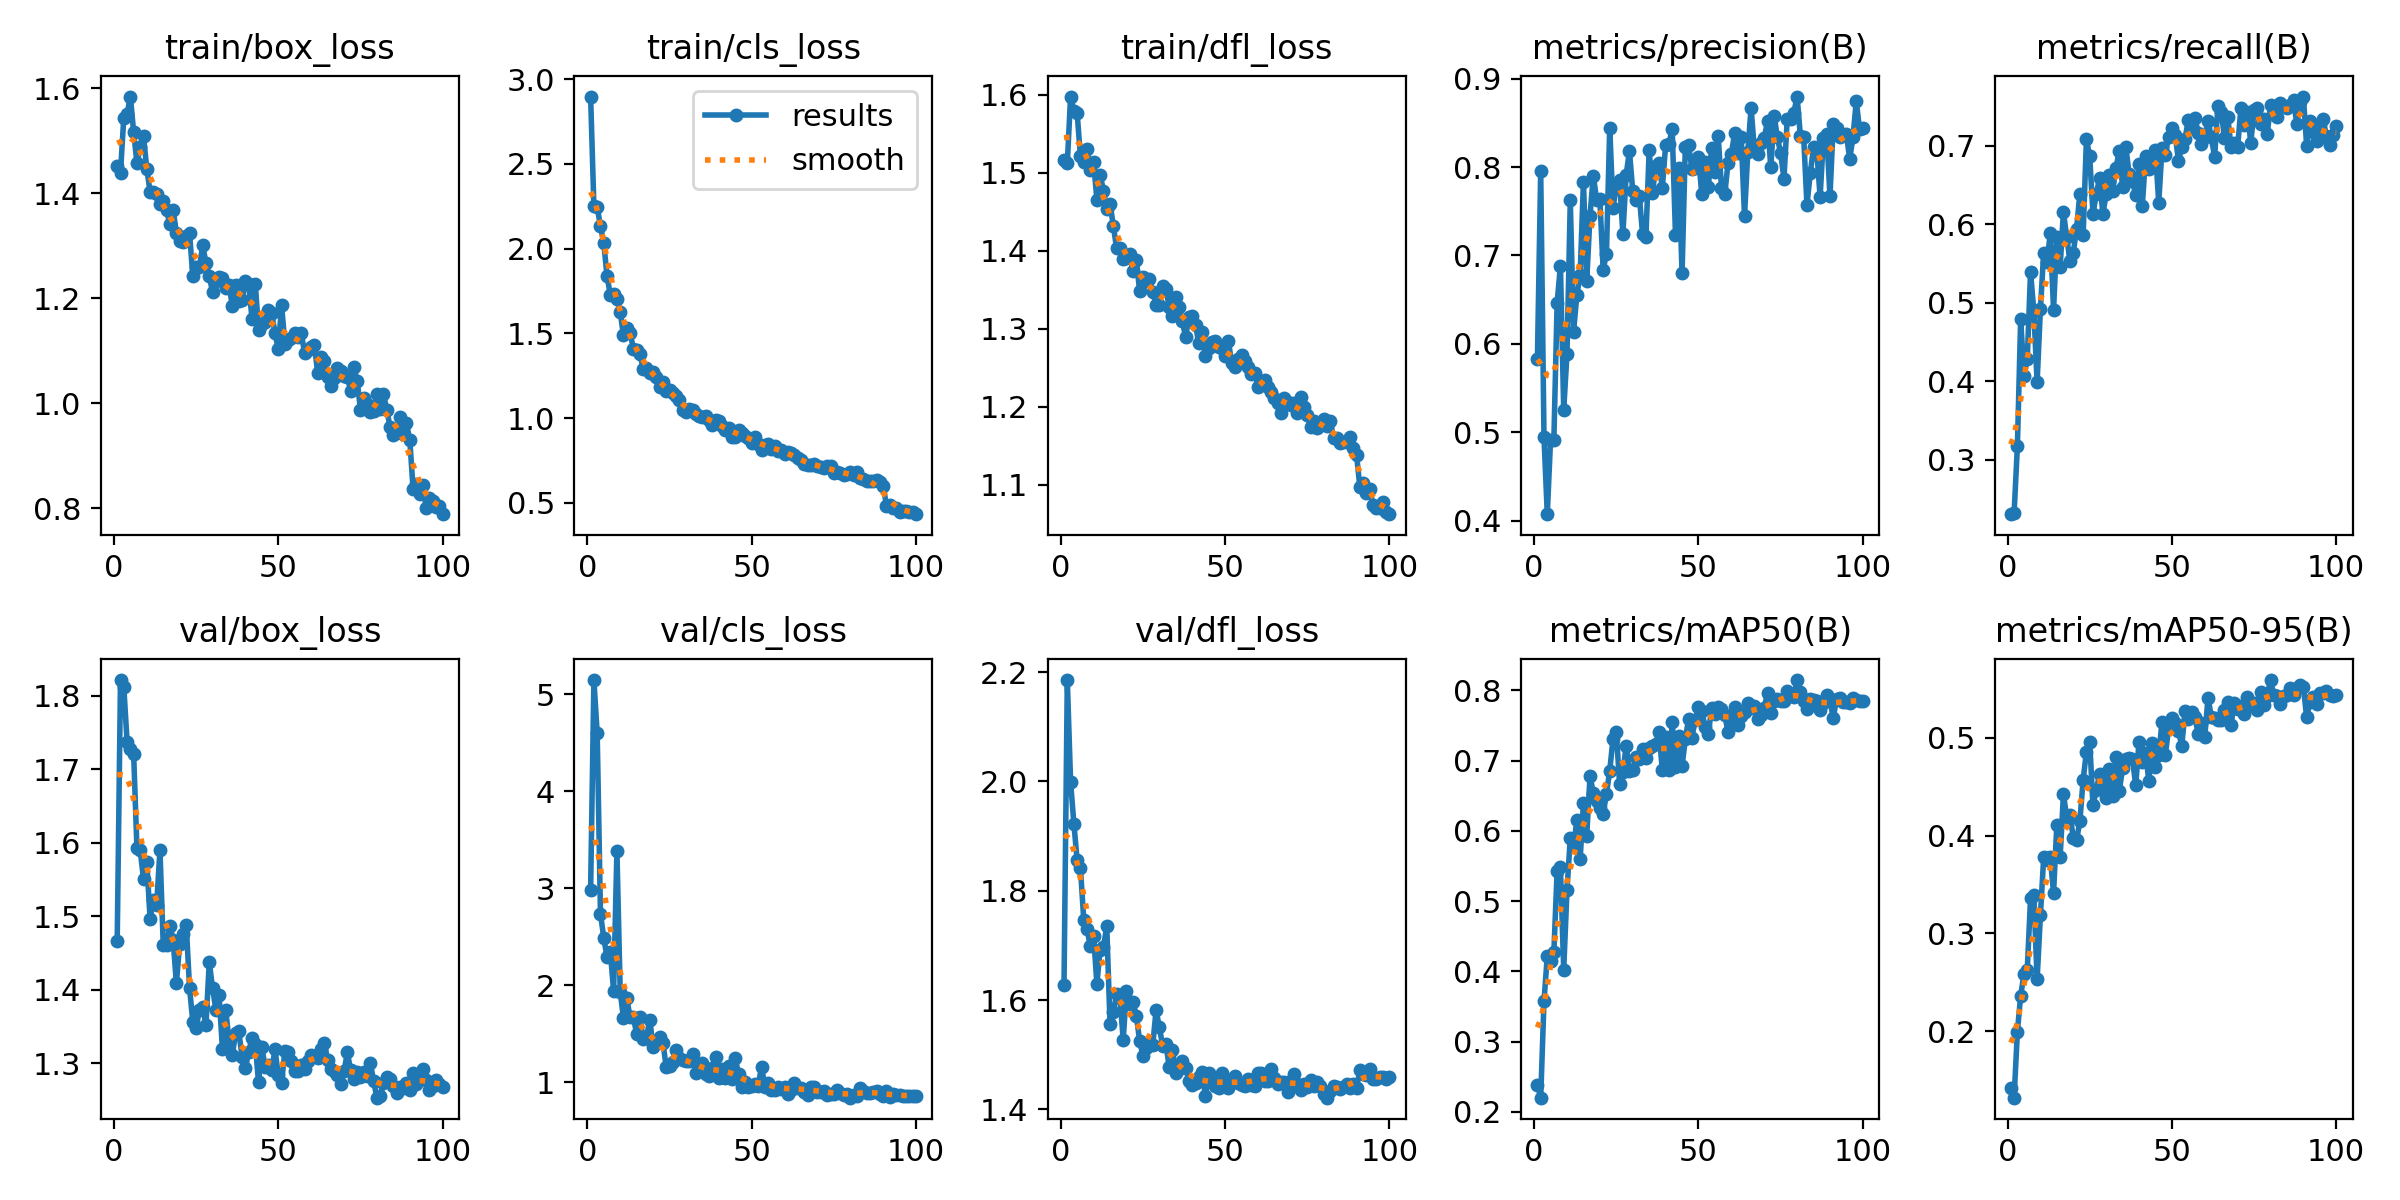


YOLOv8n Confusion Matrix:


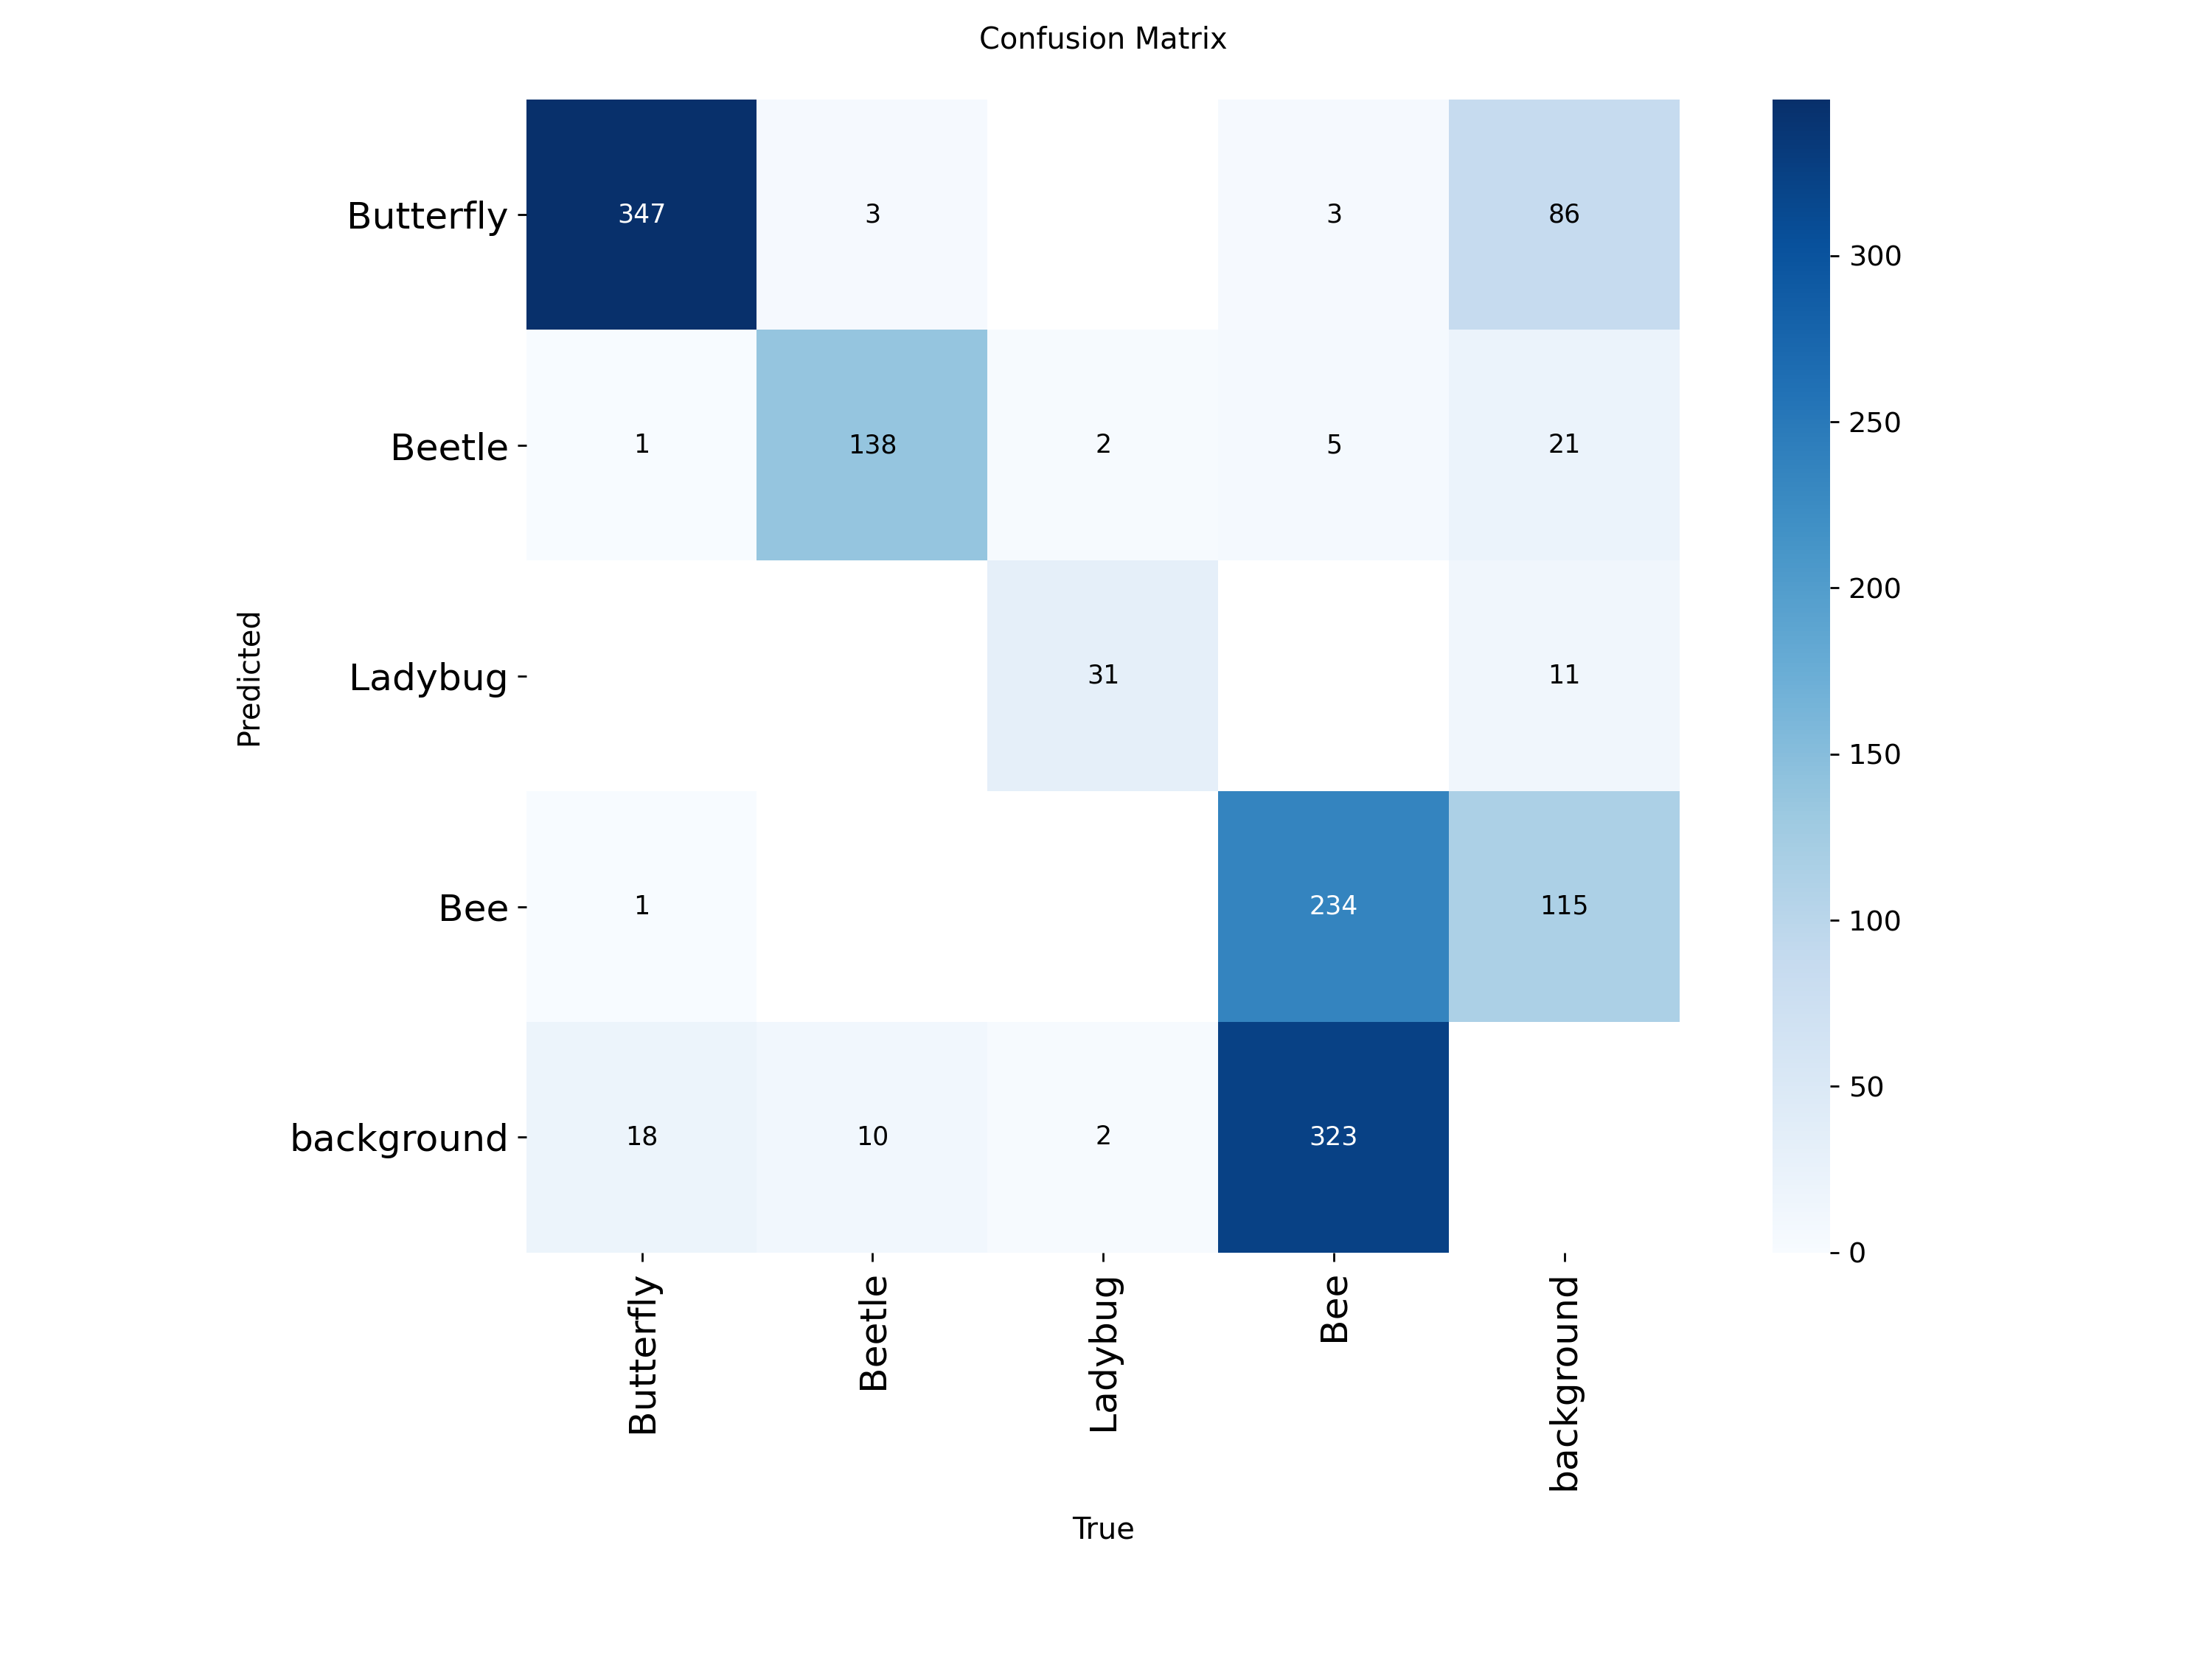

In [19]:
# Display training results for YOLOv8n
yolo8n_results_dir = os.path.join(PROJECT_DIR, 'yolo8n_insect_detection')
results_img = os.path.join(yolo8n_results_dir, 'results.png')

if os.path.exists(results_img):
    print("YOLOv8n Training Results:")
    display(Image(filename=results_img))

# Display confusion matrix
confusion_matrix_img = os.path.join(yolo8n_results_dir, 'confusion_matrix.png')
if os.path.exists(confusion_matrix_img):
    print("\nYOLOv8n Confusion Matrix:")
    display(Image(filename=confusion_matrix_img))

## 14. Summary

Print final summary of trained models and their locations.

In [22]:
print("\n" + "="*70)
print("TRAINING COMPLETE - SUMMARY")
print("="*70)

print("\nTrained Models Location:")
print(f"  YOLO11n: {os.path.join(yolo11n_results_dir, 'weights/best.pt')}")
print(f"  YOLOv8n: {os.path.join(yolo8n_results_dir, 'weights/best.pt')}")

print("\nFinal Test Performance:")
print(f"  YOLO11n - mAP50: {test_metrics_yolo11n.box.map50:.4f}, mAP50-95: {test_metrics_yolo11n.box.map:.4f}")
print(f"  YOLOv8n - mAP50: {test_metrics_yolo8n.box.map50:.4f}, mAP50-95: {test_metrics_yolo8n.box.map:.4f}")

print("\nDataset:")
print(f"  Classes: Butterfly, Beetle, Ladybug, Bee")
print(f"  Training epochs: {EPOCHS}")
print(f"  Image size: {IMG_SIZE}")

print("\n" + "="*70)
print("To use the trained models:")
print(f"  model = YOLO('{os.path.join(yolo11n_results_dir, 'weights/best.pt')}')")
print("  results = model.predict('path/to/image.jpg')")
print("="*70)


TRAINING COMPLETE - SUMMARY

Trained Models Location:
  YOLO11n: /home/muneeb/fyp/runs/yolo11n_insect_detection/weights/best.pt
  YOLOv8n: /home/muneeb/fyp/runs/yolo8n_insect_detection/weights/best.pt

Final Test Performance:
  YOLO11n - mAP50: 0.7269, mAP50-95: 0.5089
  YOLOv8n - mAP50: 0.7201, mAP50-95: 0.5199

Dataset:
  Classes: Butterfly, Beetle, Ladybug, Bee
  Training epochs: 100
  Image size: 640

To use the trained models:
  model = YOLO('/home/muneeb/fyp/runs/yolo11n_insect_detection/weights/best.pt')
  results = model.predict('path/to/image.jpg')


## Interactive Inference - Side by Side Model Comparison

Upload your own images and see predictions from both YOLO11n and YOLO8n models side by side.

In [40]:
import os
from pathlib import Path
from IPython.display import display, clear_output
from ipywidgets import FileUpload, Button, VBox, HBox, Output, Text, Label
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Enable inline plotting
%matplotlib inline

# Load both trained models
yolo11_model_path = 'runs/yolo11n_insect_detection2/weights/best.pt'
yolo8_model_path = 'runs/yolo8n_insect_detection/weights/best.pt'

model_yolo11 = YOLO(yolo11_model_path)
model_yolo8 = YOLO(yolo8_model_path)

print(f"✓ YOLO11n model loaded from: {yolo11_model_path}")
print(f"✓ YOLO8n model loaded from: {yolo8_model_path}")

✓ YOLO11n model loaded from: runs/yolo11n_insect_detection2/weights/best.pt
✓ YOLO8n model loaded from: runs/yolo8n_insect_detection/weights/best.pt


In [41]:
def compare_models_on_image(image_path):
    """
    Run both YOLO11 and YOLO8 models on the same image and display results side by side.
    """
    # Read the image
    img = cv2.imread(str(image_path))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Run inference on both models
    results_yolo11 = model_yolo11(image_path, conf=0.25)[0]
    results_yolo8 = model_yolo8(image_path, conf=0.25)[0]
    
    # Get annotated images
    annotated_yolo11 = results_yolo11.plot()
    annotated_yolo8 = results_yolo8.plot()
    
    # Convert BGR to RGB for matplotlib
    annotated_yolo11_rgb = cv2.cvtColor(annotated_yolo11, cv2.COLOR_BGR2RGB)
    annotated_yolo8_rgb = cv2.cvtColor(annotated_yolo8, cv2.COLOR_BGR2RGB)
    
    # Create side by side comparison with enhanced styling
    fig, axes = plt.subplots(1, 3, figsize=(21, 7))
    fig.suptitle(f'Model Comparison: {Path(image_path).name}', fontsize=16, fontweight='bold', y=0.98)
    
    # Original image
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image', fontsize=13, fontweight='bold', pad=10)
    axes[0].axis('off')
    axes[0].text(0.5, -0.05, f'Size: {img.shape[1]}x{img.shape[0]}', 
                 ha='center', va='top', transform=axes[0].transAxes, fontsize=10)
    
    # YOLO11n results
    axes[1].imshow(annotated_yolo11_rgb)
    num_detections_11 = len(results_yolo11.boxes)
    axes[1].set_title(f'YOLO11n Predictions', fontsize=13, fontweight='bold', color='#1f77b4', pad=10)
    axes[1].axis('off')
    axes[1].text(0.5, -0.05, f'{num_detections_11} detections', 
                 ha='center', va='top', transform=axes[1].transAxes, 
                 fontsize=11, fontweight='bold', color='#1f77b4')
    
    # YOLO8n results
    axes[2].imshow(annotated_yolo8_rgb)
    num_detections_8 = len(results_yolo8.boxes)
    axes[2].set_title(f'YOLO8n Predictions', fontsize=13, fontweight='bold', color='#2ca02c', pad=10)
    axes[2].axis('off')
    axes[2].text(0.5, -0.05, f'{num_detections_8} detections', 
                 ha='center', va='top', transform=axes[2].transAxes, 
                 fontsize=11, fontweight='bold', color='#2ca02c')
    
    plt.tight_layout()
    plt.show()
    
    # Print detection details with better formatting
    print("\n" + "="*85)
    print(f"📸 IMAGE: {Path(image_path).name}")
    print("="*85)
    
    # Create comparison table
    print(f"\n{'Model':<15} {'Detections':<12} {'Details':<50}")
    print("-" * 85)
    
    # YOLO11n details
    yolo11_details = []
    if num_detections_11 > 0:
        for i, box in enumerate(results_yolo11.boxes):
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            class_name = results_yolo11.names[cls]
            yolo11_details.append(f"{class_name}({conf:.1%})")
    
    yolo11_str = ", ".join(yolo11_details) if yolo11_details else "None"
    print(f"🔵 YOLO11n{'':<6} {num_detections_11:<12} {yolo11_str}")
    
    # YOLO8n details
    yolo8_details = []
    if num_detections_8 > 0:
        for i, box in enumerate(results_yolo8.boxes):
            cls = int(box.cls[0])
            conf = float(box.conf[0])
            class_name = results_yolo8.names[cls]
            yolo8_details.append(f"{class_name}({conf:.1%})")
    
    yolo8_str = ", ".join(yolo8_details) if yolo8_details else "None"
    print(f"🟢 YOLO8n{'':<7} {num_detections_8:<12} {yolo8_str}")
    
    print("="*85)
    
    # Show detailed breakdown if there are detections
    if num_detections_11 > 0 or num_detections_8 > 0:
        print(f"\n{'Detailed Detection Breakdown:'}")
        print("-" * 85)
        
        if num_detections_11 > 0:
            print(f"\n🔵 YOLO11n Detections:")
            for i, box in enumerate(results_yolo11.boxes):
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = results_yolo11.names[cls]
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                print(f"   {i+1}. {class_name:<12} - Confidence: {conf:>6.1%}  BBox: [{x1:>4.0f}, {y1:>4.0f}, {x2:>4.0f}, {y2:>4.0f}]")
        
        if num_detections_8 > 0:
            print(f"\n🟢 YOLO8n Detections:")
            for i, box in enumerate(results_yolo8.boxes):
                cls = int(box.cls[0])
                conf = float(box.conf[0])
                class_name = results_yolo8.names[cls]
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
                print(f"   {i+1}. {class_name:<12} - Confidence: {conf:>6.1%}  BBox: [{x1:>4.0f}, {y1:>4.0f}, {x2:>4.0f}, {y2:>4.0f}]")
        
        print("="*85)
    
    print()

In [42]:
# Create interactive widgets for image upload
upload_widget = FileUpload(
    accept='image/*',
    multiple=True,
    description='Upload Images'
)

path_input = Text(
    placeholder='Or enter image path(s) separated by comma',
    description='Path(s):',
    layout={'width': '500px'}
)

process_button = Button(
    description='🔍 Run Inference',
    button_style='success',
    layout={'width': '200px'}
)

output_area = Output()

def process_images(b):
    """Process uploaded images or images from path"""
    with output_area:
        clear_output()
        
        image_files = []
        
        # Check for uploaded files
        if upload_widget.value:
            print("Processing uploaded images...")
            for uploaded_file in upload_widget.value:
                # Save uploaded file temporarily
                temp_path = f"/tmp/{uploaded_file['name']}"
                with open(temp_path, 'wb') as f:
                    f.write(uploaded_file['content'])
                image_files.append(temp_path)
        
        # Check for path input
        if path_input.value.strip():
            print("Processing images from path(s)...")
            paths = [p.strip() for p in path_input.value.split(',')]
            for path in paths:
                if os.path.exists(path):
                    if os.path.isfile(path):
                        image_files.append(path)
                    elif os.path.isdir(path):
                        # Add all images from directory
                        for ext in ['*.jpg', '*.jpeg', '*.png', '*.bmp']:
                            image_files.extend(Path(path).glob(ext))
                            image_files.extend(Path(path).glob(ext.upper()))
                else:
                    print(f"⚠️  Path not found: {path}")
        
        if not image_files:
            print("❌ No images provided. Please upload images or enter a valid path.")
            return
        
        print(f"\n📊 Processing {len(image_files)} image(s)...\n")
        
        # Process each image
        for img_path in image_files:
            try:
                compare_models_on_image(str(img_path))
            except Exception as e:
                print(f"❌ Error processing {img_path}: {str(e)}\n")

# Attach button click handler
process_button.on_click(process_images)

# Display the interface
display(VBox([
    Label('📸 Upload Images or Enter Path'),
    upload_widget,
    path_input,
    process_button,
    output_area
]))